In [4]:
# Import Pandas
import pandas as pd

# Load Movies Metadata: a dataset with 45466 rows/movies and 24 columns/features
metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

# Print the first three rows
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [28]:
metadata.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'], dtype=object)

In [30]:
metadata[['vote_average', 'vote_count']][:5]

,vote_average,vote_count
0,7.7,5415.0
1,6.9,2413.0
2,6.5,92.0
3,6.1,34.0
4,5.7,173.0


In [34]:
# plot description of a movie'
metadata["overview"][:5]

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

# 1 simple recommender: based on weighted Rating

#### Why weighted rating?

##### Rating alone cannot be a good criterion, and we should count in how many people voted for a specific rating

#### m is the hyperparameter to be determined. Let's assume the m=min_votes=90% for here

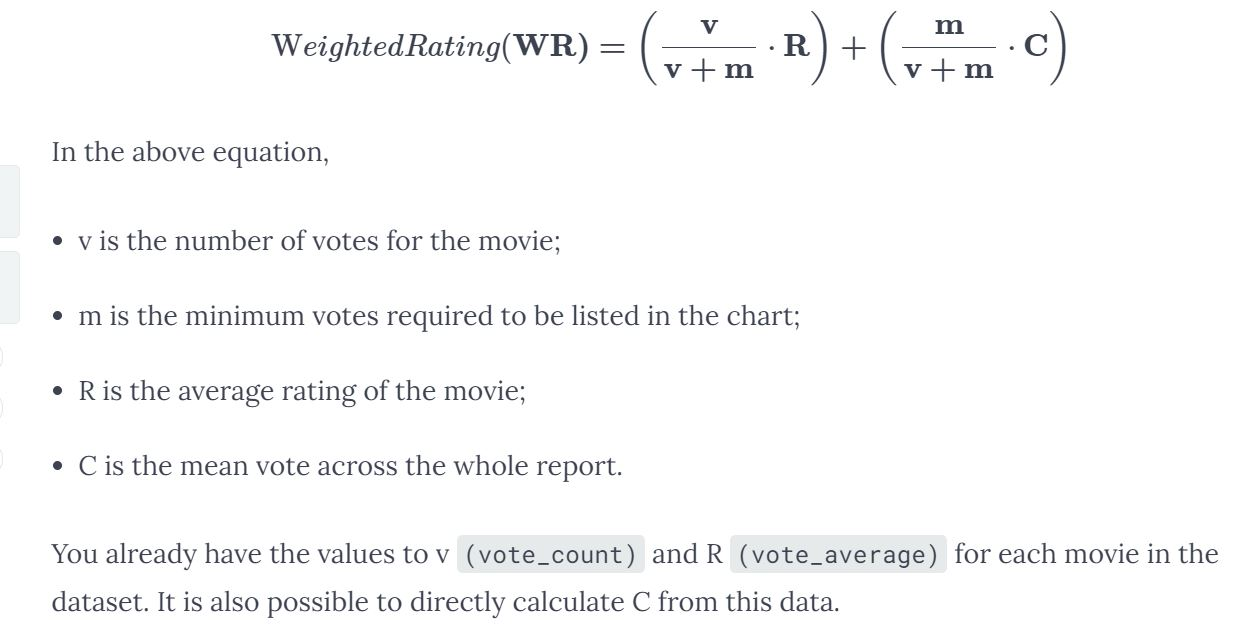

#### mean value of rating in our database ( = C in above weighted rating)

Avg rating of a movie on IMDB is around 5.6 on a scale of 10.

In [5]:
# Calculate mean of vote average column
C = metadata['vote_average'].mean()
print(C)

5.618207215134185


#### what to select as min vote number (m=?): Let's see what the min # of votes in our dataset, if we count the top 90% of movies in terms of most voted movies. 

We will see that we should filter out movies with < 160 votes

In [33]:
# Calculate the minimum number of votes required to be in the chart, m
m = metadata['vote_count'].quantile(0.90)
print(m)

160.0


#### We will see that only ~4000 movies out of ~45000 pass this criterion

In [7]:
q_movies = metadata.copy().loc[metadata['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [10]:
# Function that computes the weighted rating of each movie

# In this definition, if a movie has a very large # of votes (v -> infiniti), then the effect of avergae rates of all 
# movies (C) will be zero, and only the effect of movies rate (R) will be considered

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [12]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


##### Well, from the above output, you can see that the simple recommender did a great job!

Since the chart has a lot of movies in common with the IMDB Top 250 chart: for example, your top two movies, "Shawshank Redemption" and "The Godfather", are the same as IMDB and we all know they are indeed amazing movies, in fact, all top 20 movies do deserve to be in that list, isn't it?

# 2 Content-Based Recommender

#### Plot Description Based Recommender
Recommend movies that are similar to a particular movie.

To achieve this, you will compute pairwise cosine similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score threshold.

The plot description is available to you as the "overview" feature in your metadata dataset.

#### Let's inspect the plots of a few movies:

In [13]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

#### NLP analysis of "overview" feature using TF-IDF

Term Frequency-Inverse Document Frequency (TF-IDF): This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document), and each column represents a movie, as before.

the TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. 

In [14]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
metadata['overview'] = metadata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(45466, 75827)

In [43]:
tfidf_matrix

<1000x75827 sparse matrix of type '<class 'numpy.float64'>'
	with 26858 stored elements in Compressed Sparse Row format>

From the above output, we observe that 75,827 different vocabularies or words in our dataset of > 45,000 movies.

In [15]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[5000:5010]

['avails',
 'avaks',
 'avalanche',
 'avalanches',
 'avallone',
 'avalon',
 'avant',
 'avanthika',
 'avanti',
 'avaracious']

#### Calculate the Cosine Similaruty Score

cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate

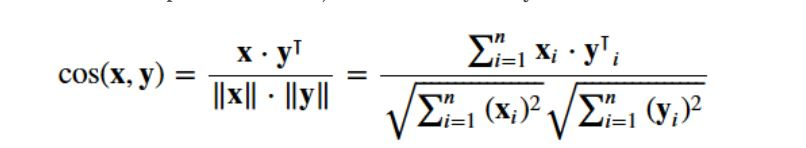


Since you have used the TF-IDF vectorizer, calculating the dot product between each vector will directly give you the cosine similarity score. Therefore, you will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

This would return a matrix of shape 45466x45466, which means each movie overview cosine similarity score with every other movie overview. Hence, each movie will be a 1x45466 column vector where each column will be a similarity score with each movie.

In [19]:
# Just to save the memory: tfidf_matrix is too big for my personal machine
tfidf_matrix = tfidf_matrix[0:1000]
tfidf_matrix.shape


(1000, 75827)

In [20]:

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

print(cosine_sim.shape)

print(cosine_sim[1])


(1000, 1000)
[0.01504121 1.         0.04681953 0.         0.         0.05018805
 0.         0.         0.1025322  0.         0.00721657 0.
 0.         0.00786494 0.         0.         0.         0.0278222
 0.         0.         0.         0.         0.00560126 0.
 0.         0.0234883  0.02324945 0.00624991 0.         0.
 0.         0.04612967 0.         0.0052072  0.00402    0.
 0.         0.         0.         0.         0.         0.
 0.         0.02503359 0.         0.         0.01768011 0.00774432
 0.         0.01581817 0.00469205 0.         0.0250365  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00913776 0.         0.01763035 0.00627984
 0.         0.         0.         0.         0.         0.
 0.00819822 0.         0.         0.         0.         0.00554642
 0.         0.         0.         0.00485734 0.00497367 0.
 0.         0.02681704 0.         0.         0.         0.01622588
 0.         0.         0.         0.01325692 0.0162505 

# Define the Recommendar 

#### Re-indexing the dataset

The steps to define the recommendar:
1) Get the index of the movie given its title.

2) Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position, and the second is the similarity score.

3) Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

4) Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).

5) Return the titles corresponding to the indices of the top elements.

In [21]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

indices[:5]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [22]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [24]:
get_recommendations('Grumpier Old Men')

443               Fearless
235          A Goofy Movie
456                Go Fish
844           Gone Fishin'
70               Fair Game
674           Country Life
527             Serial Mom
57             The Postman
244             Houseguest
607    Bread and Chocolate
Name: title, dtype: object

# 3 More Accurate Content-based Recommendar

Adding more logics from our meta data: the 3 top actors, the director, related genres, and the movie plot keywords.

Reference:
https://www.datacamp.com/community/tutorials/recommender-systems-python